#### Generate learning curves for 3D Mountain Car

In [1]:
from GAME.utils.config import config
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from GAME.utils.helper_funcs import generate_MC_learning_curves

config_data = config()

In [2]:
MC3D_train_folder_path = os.path.join(config_data['data_path'], 'mountain_car')
MC3D_train_filepath = os.path.join(MC3D_train_folder_path, 'eval_MC3D_no_transfer_a0.75_l0.99_e0.01_nt8.csv')

In [3]:
df = pd.read_csv(MC3D_train_filepath, index_col=False)

In [6]:
trials = df.Trial.unique()
trial = 5

df_by_trial = df[df['Trial'] == trial].reset_index(drop = True)

output_X, output_Y = generate_MC_learning_curves(df_by_trial, 10, 0.01, 1)

In [4]:
output_X = []
output_Y = []
for trial in range(10):
    df_by_trial = df[df['Trial'] == trial].reset_index(drop = True)
    trial_output_X, trial_output_Y = generate_MC_learning_curves(df_by_trial, 10, 0.01, 1)
    output_X.append(trial_output_X)
    output_Y.append(trial_output_Y)

In [5]:
avg_output_X = output_X[0]
output_Y = np.array(output_Y)
avg_output_Y = output_Y.mean(axis=0)

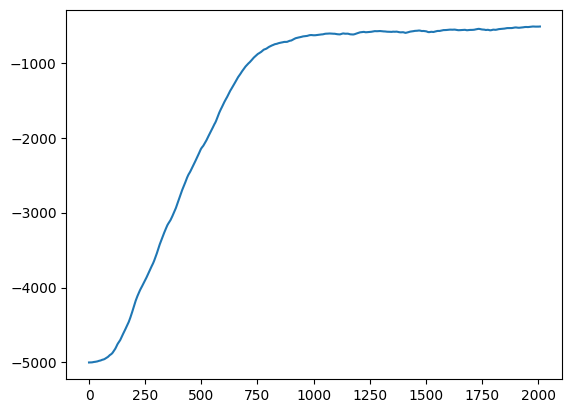

In [6]:
plt.plot(avg_output_X, avg_output_Y)

In [9]:
MC3D_train_folder_path = os.path.join(config_data['output_path'], '11152022 Train MC3D With Transfer Mapping 010110202')
MC3D_train_filepath = os.path.join(MC3D_train_folder_path, 'eval_3DMC_a0.75_l0.99_e0.01_nt8.csv')

df = pd.read_csv(MC3D_train_filepath, index_col=False)

trials = df.Trial.unique()
trial = 0

df_by_trial = df[df['Trial'] == trial].reset_index(drop = True)

output_X1, output_Y2 = generate_MC_learning_curves(df_by_trial, 10, 0.01, 1)

In [10]:
output_X1 = []
output_Y1 = []
for trial in range(10):
    df_by_trial = df[df['Trial'] == trial].reset_index(drop = True)
    trial_output_X, trial_output_Y = generate_MC_learning_curves(df_by_trial, 10, 0.01, 1)
    output_X1.append(trial_output_X)
    output_Y1.append(trial_output_Y)

avg_output_X1 = output_X1[0]
output_Y1 = np.array(output_Y1)
avg_output_Y1 = output_Y1.mean(axis=0)

In [ ]:
output_X2 = []
output_Y2 = []
for trial in range(10):
    df_by_trial = df[df['Trial'] == trial].reset_index(drop = True)
    trial_output_X, trial_output_Y = generate_MC_learning_curves(df_by_trial, 10, 0.01, 1)
    output_X2.append(trial_output_X)
    output_Y2.append(trial_output_Y)

avg_output_X2 = output_X2[0]
output_Y2 = np.array(output_Y2)
avg_output_Y2 = output_Y2.mean(axis=0)

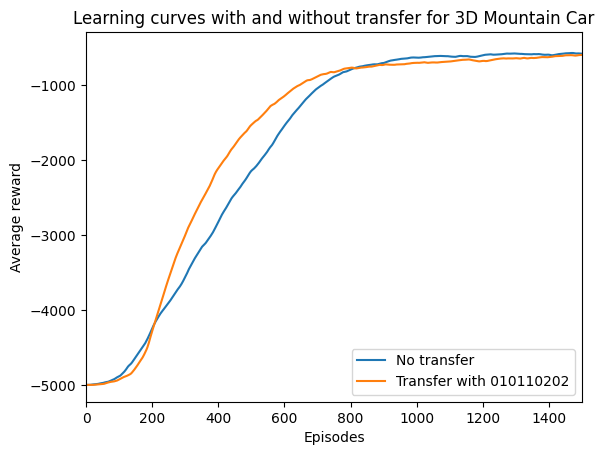

In [12]:
plt.plot(avg_output_X, avg_output_Y, label = 'No transfer')
plt.plot(avg_output_X1, avg_output_Y1, label = 'Transfer with 010110202')
plt.xlim(0, 1500)
plt.xlabel('Episodes')
plt.ylabel('Average reward')
plt.title('Learning curves with and without transfer for 3D Mountain Car')
plt.legend()

#### Consolidated across five experiments

In [2]:
from GAME.utils.config import config
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from GAME.utils.helper_funcs import generate_MC_learning_curves

config_data = config()

In [3]:
def generate_MC_learning_curves(training_data:pd.DataFrame, window_size:int=10, alpha:float=0.01, coarse:int=30) -> tuple:
    """
    Description:
        Graphs Mountain Car learning curves using .csv training output files.

    Arguments:
        training_data: a pandas DataFrame containing the trial number, the episode, and the reward for that episode.
        window_size: the size of the sliding window for averaging the number of steps.
        alpha: alpha value used in the low-pass filter to smooth the curve.
        coarse: every coarse-th point gets outputted to cut down on file size.

    Return:
        (tuple) a list of the training time and a list of the average episode durations.
    """
    # init variables
    ep_reward_sum = 0 # Window sum of episode durations
    start = 0
    q = np.zeros(shape = (1, window_size))
    output_X = []
    output_Y = []
    output_eps = []
    eps = 0

    # read the first window_size entries
    i = 0
    for ind, row in training_data.iterrows():
        # fill window
        if ind < window_size:
            ep_reward = row['Reward']
            q[0][i] = ep_reward
            ep_reward_sum += q[0][i]
            i += 1
        else:
            break

    # read the rest of the data
    i = 0
    ccount = 0
    prev = ep_reward_sum
    for ind, row in training_data.iterrows():
        if ind >= window_size:
            if ccount % coarse == 0:
                output_X.append(start)
                output_Y.append(prev / window_size)
                output_eps.append(eps)
            
            ep_reward_sum -= q[0][i]
            ep_reward = row['Reward']
            q[0][i] = ep_reward
            ep_reward_sum += q[0][i]
            start = row['Episode']
            eps += 1

            prev = (1 - alpha) * prev + alpha * ep_reward_sum
            i = (i + 1) % window_size
            ccount += 1
    
    # return the parsed kwy data
    return output_X, output_Y, output_eps

In [4]:
def plot_MC(df, trials):
    output_X = []
    output_Y = []
    output_eps = []
    for trial in range(trials):
        df_by_trial = df[df['Trial'] == trial].reset_index(drop = True)
        trial_output_X, trial_output_Y, trial_output_eps = generate_MC_learning_curves(df_by_trial, 10, 0.01, 1)
        output_X.append(trial_output_X)
        output_Y.append(trial_output_Y)
        output_eps.append(trial_output_eps)

    avg_output_X = output_X[0]
    output_Y = np.array(output_Y)
    avg_output_Y = output_Y.mean(axis=0)

    return avg_output_X, avg_output_Y, output_eps[0]

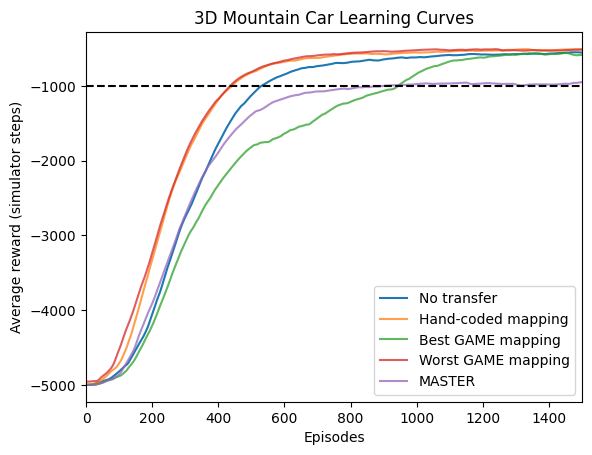

In [7]:
# MC3D_train_no_transfer_folder_path = os.path.join(config_data['data_path'], 'mountain_car')
MC3D_train_no_transfer_folder_path = os.path.join(config_data['output_path'], '12152022 Train MC3D No Transfer')
MC3D_train_no_transfer_filepath = os.path.join(MC3D_train_no_transfer_folder_path, 'eval_3DMC_a0.75_l0.99_e0_nt8.csv')
df = pd.read_csv(MC3D_train_no_transfer_filepath, index_col=False)
output_X, output_Y, _ = plot_MC(df, 10)
plt.plot(output_X, output_Y, label = 'No transfer')

experiments = ['12152022 Train MC3D With Transfer Mapping 010110202', '11152022 Train MC3D With Transfer Mapping 010100000', 
'12152022 Train MC3D With Transfer Mapping 101011111', '11142022 Train MC3D With Transfer Mapping 0101master']
experiment_name = ['Hand-coded mapping', 'Best GAME mapping', 'Worst GAME mapping', 'MASTER']
for exp_idx, experiment in enumerate(experiments):
    MC3D_train_transfer_folder_path = os.path.join(config_data['output_path'], experiment)
    MC3D_train_transfer_filepath = os.path.join(MC3D_train_transfer_folder_path, 'eval_3DMC_a0.75_l0.99_e0.01_nt8.csv')
    df = pd.read_csv(MC3D_train_transfer_filepath, index_col=False)
    output_X, output_Y, _ = plot_MC(df, 10)
    plt.plot(output_X, output_Y, label = '{}'.format(experiment_name[exp_idx]), alpha=0.75)

plt.plot([0, 1500], [-1000, -1000], 'k--')

plt.xlim(0, 1500)
plt.xlabel('Episodes')
plt.ylabel('Average reward (simulator steps)')
plt.title('3D Mountain Car Learning Curves')
plt.legend()

In [1]:
import os

with open("E:\\VAULT 419\\Files\\School\\JHU Archive\\Fall 2022\\Evolutionary and Swarm Intelligence\\src\\GAME\\pickle\\12162022 Train MC3D With QValue Transfer Mapping 010110202\\test.pickle", 'wb') as f:
    print("h")

h


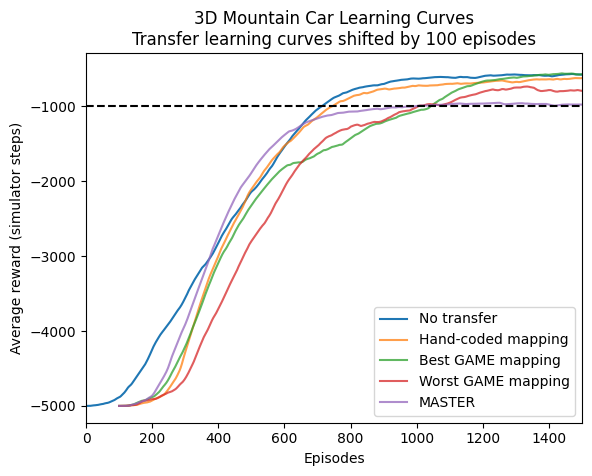

In [5]:
MC3D_train_no_transfer_folder_path = os.path.join(config_data['data_path'], 'mountain_car')
MC3D_train_no_transfer_filepath = os.path.join(MC3D_train_no_transfer_folder_path, 'eval_MC3D_no_transfer_a0.75_l0.99_e0.01_nt8.csv')
df = pd.read_csv(MC3D_train_no_transfer_filepath, index_col=False)
output_X, output_Y, _ = plot_MC(df, 10)
plt.plot(output_X, output_Y, label = 'No transfer')

experiments = ['11152022 Train MC3D With Transfer Mapping 010110202', '11152022 Train MC3D With Transfer Mapping 010100000', 
'11152022 Train MC3D With Transfer Mapping 101011111', '11142022 Train MC3D With Transfer Mapping 0101master']
experiment_name = ['Hand-coded mapping', 'Best GAME mapping', 'Worst GAME mapping', 'MASTER']
for exp_idx, experiment in enumerate(experiments):
    MC3D_train_transfer_folder_path = os.path.join(config_data['output_path'], experiment)
    MC3D_train_transfer_filepath = os.path.join(MC3D_train_transfer_folder_path, 'eval_3DMC_a0.75_l0.99_e0.01_nt8.csv')
    df = pd.read_csv(MC3D_train_transfer_filepath, index_col=False)
    output_X, output_Y, _ = plot_MC(df, 10)
    output_X = np.array(output_X) + 100
    plt.plot(output_X, output_Y, label = '{}'.format(experiment_name[exp_idx]), alpha=0.75)

plt.plot([0, 1500], [-1000, -1000], 'k--')

plt.xlim(0, 1500)
plt.xlabel('Episodes')
plt.ylabel('Average reward (simulator steps)')
plt.title('3D Mountain Car Learning Curves\nTransfer learning curves shifted by 100 episodes')
plt.legend()